In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import IntRangeSlider
from ipywidgets import FloatRangeSlider
from ipywidgets import fixed
from functools import partial, update_wrapper, lru_cache

plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams["font.size"] = 24

from scipy import stats
from scipy import special

In [2]:
@lru_cache(-1)
def ncmax(df, l):
    func = sp.stats.ncx2(df=df, nc=l).pdf
    return sp.optimize.differential_evolution(lambda x: -func(x), [(0, df+l+5)], tol=0.01, maxiter=1000).x

In [3]:
xs = np.linspace(0, 30, 150)

In [4]:
plots = {
    1: list(map(partial(ncmax, 1), xs)),
    2: list(map(partial(ncmax, 2), xs)),
    3: list(map(partial(ncmax, 3), xs))
}

$\lambda + df - 3$

In [5]:
def mymax(df, l):
    l = np.asarray(l)
    return l + df - 3

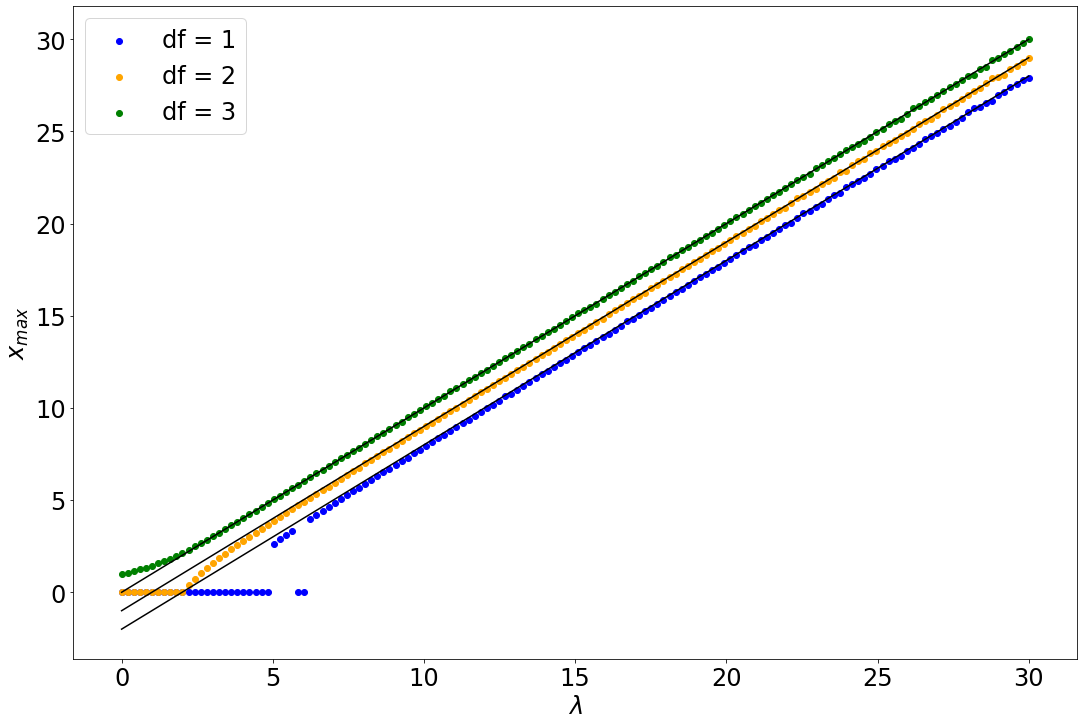

In [6]:
def plot_ncx_lines(ax, points, data):
    colors = ["blue", "orange", "green"]
    for (df, ys), color in zip(data.items(), colors):
        ax.scatter(points, ys, color=color, label=f"df = {df}")
        ax.plot(points, mymax(df, points), color="black");
plot_ncx_lines(plt.gca(), xs, plots)
plt.legend();
plt.xlabel("$\lambda$");
plt.ylabel("$x_{max}$");

$\lambda I_{\nu-1}(\sqrt{\lambda x}) = \sqrt{\lambda x} I_{\nu}(\sqrt{\lambda x})$

$\nu = \frac{df - 2}{2}$

$x = 2 \nu - 1 + \lambda = 2 \nu -1 + \frac{2 \nu -1 }{t}$

## Playground

Set number of degrees of freedom (df) and noncentrality parameter (nc)

/home/vindex10/projects/.venvs/sandbox/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


My Max:  -1.7
Real Max:  4.440892098500626e-16


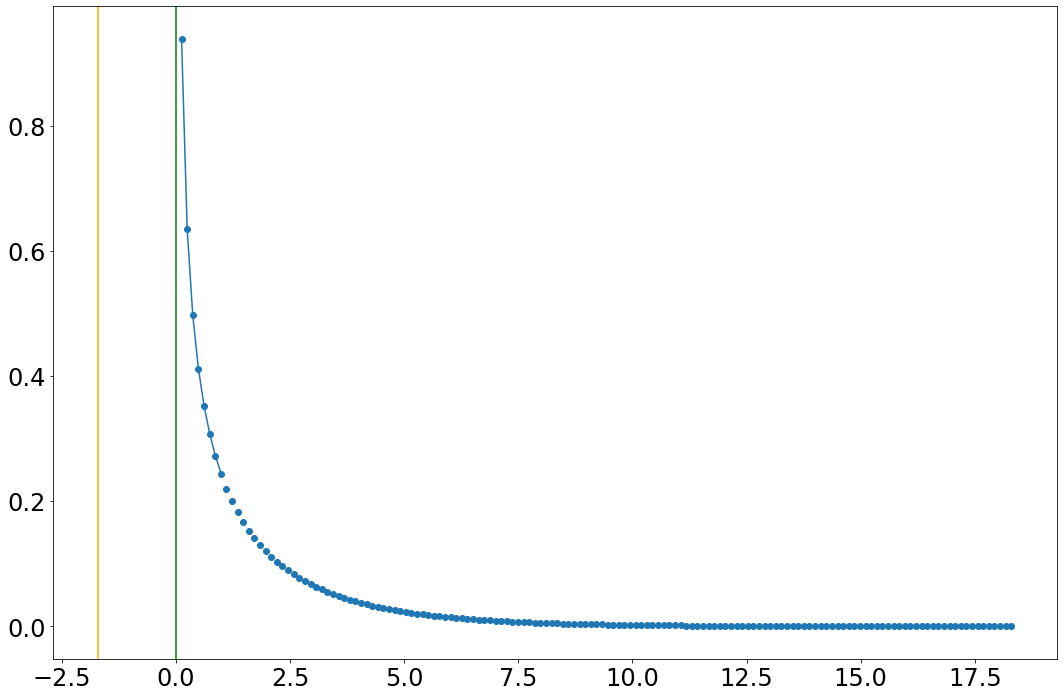

In [67]:
def playground(ax, df, nc):
    xs = np.linspace(0, nc + df - 3 + 20, 150)
    ax.scatter(xs, sp.stats.ncx2(df=df, nc=nc).pdf(xs))
    short_xs = xs[xs < 1]
    ax.plot(short_xs, 1/np.sqrt(2 * np.pi * short_xs)*np.exp(-nc/2)*(1 + 1/2*(nc-1)*short_xs + short_xs**2/4*(1/2 - nc + nc**2/6)))
    mymax_val = mymax(df, nc)
    ncmax_val = ncmax(df, nc)
    print("My Max: ", mymax_val)
    print("Real Max: ", ncmax_val[0])
    ax.axvline(mymax_val, color="orange")
    ax.axvline(ncmax_val, color="green")
playground(plt.gca(), df=1, nc=0.3)

In [6]:
sp.optimize.root_scalar(lambda x: x -1 -1/2*np.exp(-x/2), x0=0, x1=10)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.2655570214543344

In [7]:
def test(df, nc):
    playground(plt.gca(), df, nc)
    plt.show()

In [8]:
interact(test, df=(0, 20, 1), nc=(0., 20., 0.01));

interactive(children=(IntSlider(value=10, description='df', max=20), FloatSlider(value=10.0, description='nc',…

In [9]:
sp.stats.ncx2(df=1, nc=3).inter(0.0000000001)

AttributeError: 'rv_frozen' object has no attribute 'inter'

In [15]:
ncmax(3, 6)

array([5.99913794])

In [17]:
mymax(3, 6)

6

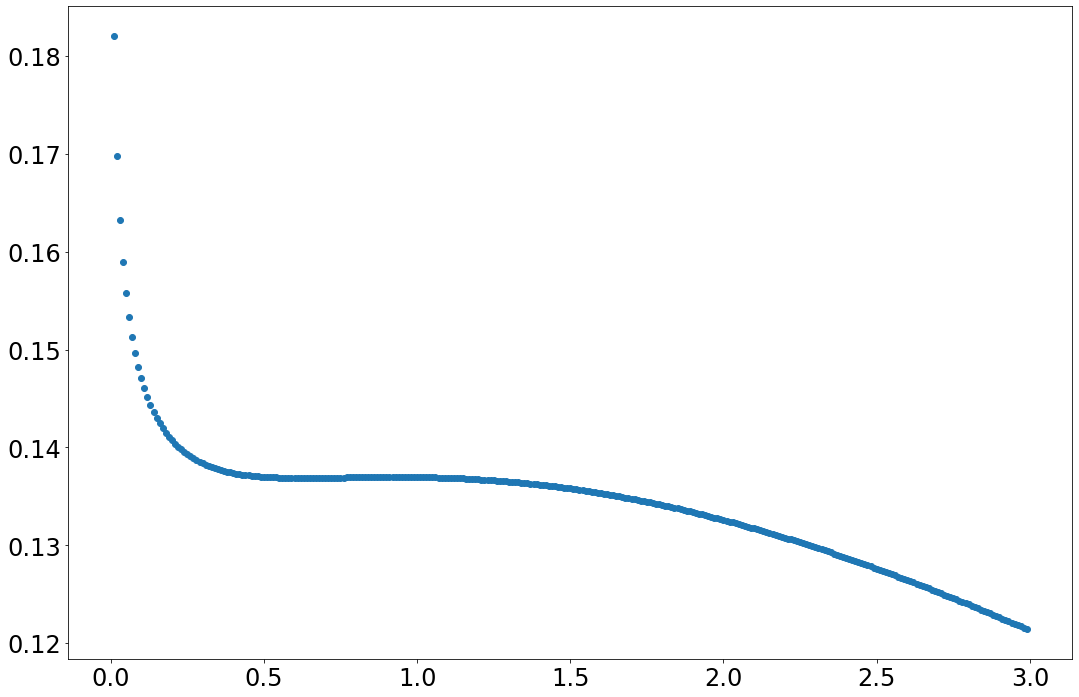

In [34]:
def test(ax, df, l):
    xs = np.arange(0, 3, 0.01)
    ax.scatter(xs, sp.stats.ncx2(df=df, nc=l).pdf(xs))
fig, ax = plt.subplots()
test(ax, 1.79, 3)